In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Users/jsurvi/internet_firewall_data.csv')


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 8, Finished, Available)

In [4]:
print(df.shape)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 9, Finished, Available)

(65532, 12)


In [5]:
# Check for duplicates
df = df.drop_duplicates()




StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 10, Finished, Available)

In [6]:
print(df.shape)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 11, Finished, Available)

(57170, 12)


In [7]:
# Handle missing values
df = df.dropna()

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 12, Finished, Available)

In [8]:
print(df.shape)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 13, Finished, Available)

(57170, 12)


In [9]:
# Separate features for PCA
X = df[['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port',
        'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 
        'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


# Create DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])

# Concatenate PCA components with the original DataFrame
df = pd.concat([df.reset_index(drop=True), df_pca.reset_index(drop=True)], axis=1)

# Print first few rows of the DataFrame with PCA components
print(df.head())

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 14, Finished, Available)

Explained variance ratio: [0.48139183 0.15495311]
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  PCA Component

In [10]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Print t-SNE components
print("t-SNE components:", X_tsne)

# Create DataFrame with t-SNE components
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Concatenate t-SNE components with the original DataFrame
df = pd.concat([df.reset_index(drop=True), df_tsne.reset_index(drop=True)], axis=1)

# Print first few rows of the DataFrame with t-SNE components
print(df.head())

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 15, Finished, Available)

t-SNE components: [[ 18.837944   -26.898037  ]
 [ -0.20858711  63.740612  ]
 [  2.752887   -64.37184   ]
 ...
 [-22.575691    14.466048  ]
 [ -2.7742763   41.26387   ]
 [ -2.7530136   41.25872   ]]
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889    

In [11]:
from sklearn.decomposition import FastICA

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Print ICA components
print("ICA components:", X_ica)

# Create DataFrame with ICA components
df_ica = pd.DataFrame(data=X_ica, columns=['ICA Component 1', 'ICA Component 2'])

# Concatenate ICA components with the original DataFrame
df = pd.concat([df.reset_index(drop=True), df_ica.reset_index(drop=True)], axis=1)

# Print first few rows of the DataFrame with ICA components
print(df.head())


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 16, Finished, Available)

ICA components: [[ 4.93171460e-05  2.60870708e-03]
 [ 5.96140385e-05  1.53505652e-03]
 [-1.62440927e-04 -2.04653932e-02]
 ...
 [-3.74543454e-03  1.65380083e-03]
 [ 1.11903120e-04  1.86220859e-03]
 [ 1.11904182e-04  1.86212286e-03]]
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   33

In [12]:
from sklearn.cluster import KMeans  # Import KMeans  
import matplotlib.pyplot as plt  # Import matlib
from sklearn.manifold import TSNE

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 17, Finished, Available)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 18, Finished, Available)

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  PCA Component 1  PCA Component 2  \
0          1              1

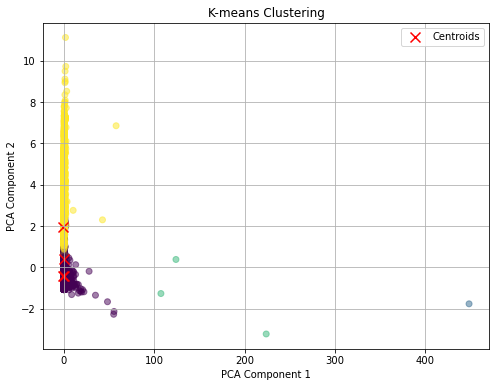

In [13]:
# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Print first few rows of the DataFrame with PCA components and cluster labels
print(df.head())

# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA Component 1'], df['PCA Component 2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Apply K-means clustering on PCA and t-SNE transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

kmeans_ica = KMeans(n_clusters=2, random_state=42)
clusters_ica = kmeans_ica.fit_predict(X_ica)



StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 19, Finished, Available)

In [15]:
from sklearn.metrics import silhouette_score

# Print silhouette scores
silhouette_pca = silhouette_score(X_scaled, clusters_pca)
silhouette_tsne = silhouette_score(X_scaled, clusters_tsne)
print("Silhouette Score for PCA:", silhouette_pca)
print("Silhouette Score for t-SNE:", silhouette_tsne)

# Calculate silhouette score for ICA
clusters_ica = kmeans.fit_predict(X_ica)
silhouette_ica = silhouette_score(X_scaled, clusters_ica)
print("Silhouette Score for ICA:", silhouette_ica)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 20, Finished, Available)

Silhouette Score for PCA: 0.9925016877094999
Silhouette Score for t-SNE: 0.041811161222930625
Silhouette Score for ICA: 0.5297645039146689


In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 21, Finished, Available)

In [19]:
# Train Isolation Forest model (anomaly detection algorithm)
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_scaled)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 24, Finished, Available)

IsolationForest(random_state=42)

In [20]:
# Train One-Class SVM model (anomaly detection algorithm)
one_class_svm = OneClassSVM()
one_class_svm.fit(X_scaled)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 25, Finished, Available)

OneClassSVM()

In [21]:
# Make predictions
isolation_forest_preds = isolation_forest.predict(X_scaled)
# Make predictions with One-Class SVM
one_class_svm_preds = one_class_svm.predict(X_scaled)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 26, Finished, Available)

In [22]:
# Calculate silhouette scores
silhouette_isolation_forest = silhouette_score(X_scaled, isolation_forest_preds)
silhouette_one_class_svm = silhouette_score(X_scaled, one_class_svm_preds)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 27, Finished, Available)

In [23]:
# Print silhouette scores
print("Silhouette Score for Isolation Forest:", silhouette_isolation_forest)
print("Silhouette Score for One-Class SVM:", silhouette_one_class_svm)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 28, Finished, Available)

Silhouette Score for Isolation Forest: 0.4941112506014656
Silhouette Score for One-Class SVM: 0.15355132733573015


In [31]:
# Train Linear Regression model (prediction model)
linear_regression = LinearRegression()
linear_regression.fit(X_scaled, df['Cluster'])  # Assuming 'Cluster' column is the target variable
# Make predictions
linear_regression_preds = linear_regression.predict(X_scaled)

silhouette_linear_regression = silhouette_score(X_scaled, linear_regression_preds)
# Print silhouette scores
print("Silhouette Score for Linear Regression:", silhouette_linear_regression)

StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 36, Finished, Available)

Silhouette Score for Linear Regression: 0.00031359180131455307


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Train Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_scaled, df['Cluster'])
random_forest_preds = random_forest.predict(X_scaled)
silhouette_random_forest = silhouette_score(X_scaled, random_forest_preds)

# Train Gradient Boosting model
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_scaled, df['Cluster'])
gbm_preds = gbm.predict(X_scaled)
silhouette_gbm = silhouette_score(X_scaled, gbm_preds)

# Train Support Vector Machine model
svm = SVR()
svm.fit(X_scaled, df['Cluster'])
svm_preds = svm.predict(X_scaled)
silhouette_svm = silhouette_score(X_scaled, svm_preds)

# Train Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_scaled, df['Cluster'])
decision_tree_preds = decision_tree.predict(X_scaled)
silhouette_decision_tree = silhouette_score(X_scaled, decision_tree_preds)

# Print silhouette scores for each model
print("Silhouette Score for Random Forest:", silhouette_random_forest)
print("Silhouette Score for Gradient Boosting:", silhouette_gbm)
print("Silhouette Score for Support Vector Machine:", silhouette_svm)
print("Silhouette Score for Decision Tree:", silhouette_decision_tree)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 9, 43, Finished, Available)

Silhouette Score for Random Forest: -0.00041917007787374815
Silhouette Score for Gradient Boosting: -0.5373861784852504
Silhouette Score for Support Vector Machine: 0.00030830722256602026
Silhouette Score for Decision Tree: 0.5186774816585338


In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor

from sklearn.linear_model import BayesianRidge, Ridge, Lasso, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor

# Train K-Nearest Neighbors model
knn = KNeighborsRegressor()
knn.fit(X_scaled, df['Cluster'])
knn_preds = knn.predict(X_scaled)
silhouette_knn = silhouette_score(X_scaled, knn_preds)

# Train Multilayer Perceptron (Neural Network) model
mlp = MLPRegressor(random_state=42)
mlp.fit(X_scaled, df['Cluster'])
mlp_preds = mlp.predict(X_scaled)
silhouette_mlp = silhouette_score(X_scaled, mlp_preds)

# Train Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_scaled, df['Cluster'])
bayesian_ridge_preds = bayesian_ridge.predict(X_scaled)
silhouette_bayesian_ridge = silhouette_score(X_scaled, bayesian_ridge_preds)

# Train Ridge Regression model
ridge = Ridge()
ridge.fit(X_scaled, df['Cluster'])
ridge_preds = ridge.predict(X_scaled)
silhouette_ridge = silhouette_score(X_scaled, ridge_preds)

# Train Lasso Regression model
lasso = Lasso()
lasso.fit(X_scaled, df['Cluster'])
lasso_preds = lasso.predict(X_scaled)
silhouette_lasso = silhouette_score(X_scaled, lasso_preds)

# Train ElasticNet Regression model
elasticnet = ElasticNet()
elasticnet.fit(X_scaled, df['Cluster'])
elasticnet_preds = elasticnet.predict(X_scaled)
silhouette_elasticnet = silhouette_score(X_scaled, elasticnet_preds)

# Reduce the size of the dataset
X_scaled_subset = X_scaled[:10000]  # Adjust the subset size as needed
df_subset = df['Cluster'][:10000]

# Train Gaussian Process Regression model on the subset
gaussian_process = GaussianProcessRegressor()
gaussian_process.fit(X_scaled_subset, df_subset)
gaussian_process_preds = gaussian_process.predict(X_scaled_subset)
silhouette_gaussian_process = silhouette_score(X_scaled_subset, gaussian_process_preds)



# Print silhouette scores for each model
print("Silhouette Score for K-Nearest Neighbors:", silhouette_knn)
print("Silhouette Score for Multilayer Perceptron:", silhouette_mlp)
print("Silhouette Score for Gaussian Process Regression:", silhouette_gaussian_process)
print("Silhouette Score for Bayesian Ridge Regression:", silhouette_bayesian_ridge)
print("Silhouette Score for Ridge Regression:", silhouette_ridge)
print("Silhouette Score for Lasso Regression:", silhouette_lasso)
print("Silhouette Score for ElasticNet Regression:", silhouette_elasticnet)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 35, Finished, Available)

Silhouette Score for K-Nearest Neighbors: 0.48934340258705356
Silhouette Score for Multilayer Perceptron: 0.00031359180131455307
Silhouette Score for Gaussian Process Regression: -0.2747254844557862
Silhouette Score for Bayesian Ridge Regression: 0.00031359180131455307
Silhouette Score for Ridge Regression: 0.00031359180131455307
Silhouette Score for Lasso Regression: -0.7415674363780714
Silhouette Score for ElasticNet Regression: -0.7415674363780714


In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, Ridge, Lasso, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score

# Train Linear Regression model (prediction model)
linear_regression = LinearRegression()
linear_regression.fit(X_scaled, df['Cluster'])  # Assuming 'Cluster' column is the target variable
# Make predictions
linear_regression_preds = linear_regression.predict(X_scaled)
# Calculate R-squared score
r2_linear_regression = r2_score(df['Cluster'], linear_regression_preds)
# Print R-squared score
print("R-squared Score for Linear Regression:", r2_linear_regression)


# Train Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_scaled, df['Cluster'])
random_forest_preds = random_forest.predict(X_scaled)
# Calculate R-squared score
r2_random_forest = r2_score(df['Cluster'], random_forest_preds)
# Print R-squared score
print("R-squared Score for Random Forest:", r2_random_forest)


# Train Gradient Boosting model
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_scaled, df['Cluster'])
gbm_preds = gbm.predict(X_scaled)
# Calculate R-squared score
r2_gbm = r2_score(df['Cluster'], gbm_preds)
# Print R-squared score
print("R-squared Score for Gradient Boosting:", r2_gbm)


# Train Support Vector Machine model
svm = SVR()
svm.fit(X_scaled, df['Cluster'])
svm_preds = svm.predict(X_scaled)
# Calculate R-squared score
r2_svm = r2_score(df['Cluster'], svm_preds)
# Print R-squared score
print("R-squared Score for Support Vector Machine:", r2_svm)


# Train Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_scaled, df['Cluster'])
decision_tree_preds = decision_tree.predict(X_scaled)
# Calculate R-squared score
r2_decision_tree = r2_score(df['Cluster'], decision_tree_preds)
# Print R-squared score
print("R-squared Score for Decision Tree:", r2_decision_tree)


# Train K-Nearest Neighbors model
knn = KNeighborsRegressor()
knn.fit(X_scaled, df['Cluster'])
knn_preds = knn.predict(X_scaled)
# Calculate R-squared score
r2_knn = r2_score(df['Cluster'], knn_preds)
# Print R-squared score
print("R-squared Score for K-Nearest Neighbors:", r2_knn)


# Train Multilayer Perceptron (Neural Network) model
mlp = MLPRegressor(random_state=42)
mlp.fit(X_scaled, df['Cluster'])
mlp_preds = mlp.predict(X_scaled)
# Calculate R-squared score
r2_mlp = r2_score(df['Cluster'], mlp_preds)
# Print R-squared score
print("R-squared Score for Multilayer Perceptron:", r2_mlp)


# Train Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_scaled, df['Cluster'])
bayesian_ridge_preds = bayesian_ridge.predict(X_scaled)
# Calculate R-squared score
r2_bayesian_ridge = r2_score(df['Cluster'], bayesian_ridge_preds)
# Print R-squared score
print("R-squared Score for Bayesian Ridge Regression:", r2_bayesian_ridge)


# Train Ridge Regression model
ridge = Ridge()
ridge.fit(X_scaled, df['Cluster'])
ridge_preds = ridge.predict(X_scaled)
# Calculate R-squared score
r2_ridge = r2_score(df['Cluster'], ridge_preds)
# Print R-squared score
print("R-squared Score for Ridge Regression:", r2_ridge)


# Train Lasso Regression model
lasso = Lasso()
lasso.fit(X_scaled, df['Cluster'])
lasso_preds = lasso.predict(X_scaled)
# Calculate R-squared score
r2_lasso = r2_score(df['Cluster'], lasso_preds)
# Print R-squared score
print("R-squared Score for Lasso Regression:", r2_lasso)


# Train ElasticNet Regression model
elasticnet = ElasticNet()
elasticnet.fit(X_scaled, df['Cluster'])
elasticnet_preds = elasticnet.predict(X_scaled)
# Calculate R-squared score
r2_elasticnet = r2_score(df['Cluster'], elasticnet_preds)
# Print R-squared score
print("R-squared Score for ElasticNet Regression:", r2_elasticnet)


StatementMeta(9aef54d9-9ad5-4e7e-a764-d0d00c9e120a, 10, 40, Finished, Available)

R-squared Score for Linear Regression: 0.8328897283754808
R-squared Score for Random Forest: 0.9989270183524102
R-squared Score for Gradient Boosting: 0.9639997434459431
R-squared Score for Support Vector Machine: 0.9466694501309325
R-squared Score for Decision Tree: 1.0
R-squared Score for K-Nearest Neighbors: 0.9941565589663224
R-squared Score for Multilayer Perceptron: 0.9600157411877871
R-squared Score for Bayesian Ridge Regression: 0.832889726381872
R-squared Score for Ridge Regression: 0.832889728002388
R-squared Score for Lasso Regression: 0.019280426776666193
R-squared Score for ElasticNet Regression: 0.4473070017338441
